In [1]:
import numpy as np
import pandas as pd



In [2]:
# import Libraries
import re
import pickle
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

import ssl



[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1122)>


In [3]:
# Importing the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/Users/sachin.kumar/Downloads/trainingandtestdata/training.1600000.processed.noemoticon.csv',
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

# Removing the unnecessary columns.
df = df[['sentiment','text']]

In [4]:
#check if there is null values
df.isnull().sum()

sentiment    0
text         0
dtype: int64

In [5]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


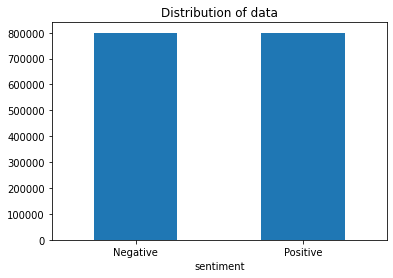

In [6]:
# replace 4 with 1
df['sentiment'] = df['sentiment'].replace(4,1)
# Plotting the distribution for dataset.
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(df['text']), list(df['sentiment'])

In [7]:
# dictionary containing all emojis.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
## set containing all stopwords.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
##Function to clean the data.
def preprocess(textdata , wordLemm):
    processedText = []
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        
        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [8]:
wordLemm = WordNetLemmatizer()
processedtext = preprocess(text , wordLemm)

In [9]:
# Single Validation
X_train , X_test , y_train , y_test = train_test_split(processedtext , sentiment , train_size = 0.8 , test_size = 0.2 , random_state = 0)

In [10]:
pd.DataFrame(X_train , y_train).info

<bound method DataFrame.info of                                                     0
1                        USER thx like ur pic a well 
1                URL who wore it better USER or USER 
1   can get it to work a yet thinking there must s...
0   USER hmm not sure if know how to fill out tick...
0   USER so sorry lot of peaceful healing vibe for...
..                                                ...
0   USER loving the zune hating the lack of canada...
1   USER sound like it wa blast have safe flight a...
0   USER feel bad for the zines still need to send...
1   USER just finished dust and moonlight this wee...
0   USER but want it to be real you would level up...

[1280000 rows x 1 columns]>

In [11]:
#incode the object columns by Tfidf
Incoder = TfidfVectorizer(ngram_range=(1,2), max_features=1000000)
Incoder.fit(X_train)

X_train = Incoder.transform(X_train)
X_test  = Incoder.transform(X_test)

In [12]:
#Function to compare between my models to chose one
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

In [13]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

              precision    recall  f1-score   support

           0       0.82      0.81      0.82    159815
           1       0.81      0.82      0.82    160185

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000



In [14]:
LogisticModel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LogisticModel.fit(X_train, y_train)
model_Evaluate(LogisticModel)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82    159815
           1       0.82      0.84      0.83    160185

    accuracy                           0.83    320000
   macro avg       0.83      0.83      0.83    320000
weighted avg       0.83      0.83      0.83    320000



In [15]:
# Saving the model and the incoder
file = open('Sentiment-LR-model.pickle','wb')
pickle.dump(LogisticModel, file)
file.close()

In [16]:
file = open('Incoder-ngram-(1,2).pickle','wb')
pickle.dump(Incoder, file)
file.close()

In [17]:
test = pd.read_csv('/Users/sachin.kumar/Desktop/bayer_reviews.csv')

In [18]:
#test

In [19]:
test_text = list(test['Reviews'])
#test_processedtext = preprocess(test_text , wordLemm)
#test_text

In [20]:
test_processedtext = preprocess(test_text , wordLemm)

In [21]:
test  = Incoder.transform(test_processedtext)

In [1]:
#test  = Incoder.transform(test['Reviews'])
#predictions = LogisticModel.predict(test)

#output = pd.DataFrame({'url': test['full_url'], 'sentiment': predictions})
#output.to_csv('/Users/sachin.kumar/Desktop/prediction.csv', index=False)
#print("Your submission was successfully saved!")

In [23]:
test.ndim

2

In [24]:
predictions = LogisticModel.predict(test)

#output = pd.DataFrame({'url': test['full_url'], 'sentiment': predictions})
#output.to_csv('/Users/sachin.kumar/Desktop/prediction.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [25]:
predictions

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [27]:
output = pd.DataFrame({'Reviews': test, 'sentiments': predictions})

In [3]:
output.to_csv('/Users/sachin.kumar/Desktop/bayer_reviews_sentiment.csv', index=False)